This is my first kernel and I have attempted using data mining to find the strongest factors affecting a student's academic perfomance and the effect alcohol consumption has on a student's performance. 
The Student Alcohol Consumption dataset was used for this project. https://www.kaggle.com/datasets/uciml/student-alcohol-consumption 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/student-alcohol-consumption/student-mat.csv', sep=',')
df.sample(frac=0.2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
252,GP,M,18,U,GT3,T,2,1,services,services,...,3,2,5,2,5,5,4,6,9,8
250,GP,M,18,U,GT3,T,3,2,services,other,...,4,4,5,2,4,5,0,6,8,8
214,GP,F,17,R,LE3,T,4,4,services,other,...,5,2,1,1,2,3,12,8,10,10
254,GP,M,17,R,GT3,T,2,1,other,other,...,4,4,2,2,4,5,0,8,12,12
158,GP,M,16,R,GT3,T,2,2,at_home,other,...,4,2,2,1,2,3,2,17,15,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,GP,F,16,U,GT3,T,4,4,health,other,...,4,4,4,1,2,2,4,14,14,14
178,GP,M,16,R,GT3,T,4,2,teacher,services,...,4,3,3,3,4,3,10,10,8,9
43,GP,M,15,U,GT3,T,2,2,services,services,...,5,4,1,1,1,1,0,8,8,11
205,GP,F,17,U,GT3,T,3,4,at_home,services,...,4,4,3,3,4,5,28,10,9,9


In [3]:
print(df.sex.unique())
print(df.famsize.unique())
print(df.guardian.unique())

['F' 'M']
['GT3' 'LE3']
['mother' 'father' 'other']


In [4]:
df = df.replace({                    
    'sex': {'F': 1, 'M': 0},          
    'famsize': {'GT3': 1, 'LE3': 0}   
                })                    
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,1,18,U,1,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,1,17,U,1,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,1,15,U,0,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,1,15,U,1,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,1,16,U,1,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,0,16,U,0,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,0,16,U,0,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,1,17,U,1,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,0,15,U,0,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,0,15,U,1,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [5]:
df = pd.get_dummies(df, columns=["guardian"]) 
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,guardian_father,guardian_mother,guardian_other
0,GP,1,18,U,1,A,4,4,at_home,teacher,...,1,1,3,6,5,6,6,0,1,0
1,GP,1,17,U,1,T,1,1,at_home,other,...,1,1,3,4,5,5,6,1,0,0
2,GP,1,15,U,0,T,1,1,at_home,other,...,2,3,3,10,7,8,10,0,1,0
3,GP,1,15,U,1,T,4,2,health,services,...,1,1,5,2,15,14,15,0,1,0
4,GP,1,16,U,1,T,3,3,other,other,...,1,2,5,4,6,10,10,1,0,0


In [6]:
df = pd.get_dummies(df, columns=["Mjob", "Fjob", "reason"]) 

df = df.replace({                     
    'school': {'GP': 1, 'MS': 0},          
    'address': {'U': 1, 'R': 0},
    'Pstatus': {'T': 1, 'A': 0},
    'schoolsup': {'yes': 1, 'no': 0},
    'famsup': {'yes': 1, 'no': 0},
    'paid': {'yes': 1, 'no': 0},
    'activities': {'yes': 1, 'no': 0},
    'nusery': {'yes': 1, 'no': 0},
    'higher': {'yes': 1, 'no': 0},
    'internet': {'yes': 1, 'no': 0},
    'romantic': {'yes': 1, 'no': 0}
                })                  
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation
0,1,1,18,1,1,0,4,4,2,2,...,0,0,0,0,0,1,1,0,0,0
1,1,1,17,1,1,1,1,1,1,2,...,0,0,0,1,0,0,1,0,0,0
2,1,1,15,1,0,1,1,1,1,2,...,0,0,0,1,0,0,0,0,1,0
3,1,1,15,1,1,1,4,2,1,3,...,0,0,0,0,1,0,0,1,0,0
4,1,1,16,1,1,1,3,3,1,2,...,0,0,0,1,0,0,0,1,0,0


<AxesSubplot:ylabel='Frequency'>

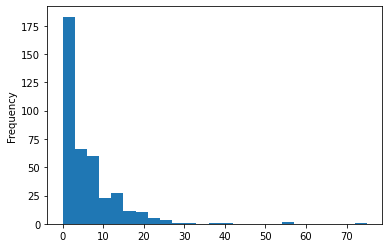

In [7]:
df.absences.plot(kind='hist', bins=25)

In [8]:
df.absences.describe()

count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

In [9]:
absences_discretized = pd.cut(df.absences, [0, 1, 5, 15, float("inf")], labels=[0, 1, 2, 3], right=False)
print(absences_discretized)

0      2
1      1
2      2
3      1
4      1
      ..
390    2
391    1
392    1
393    0
394    2
Name: absences, Length: 395, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]


In [10]:
df['absences_discretized'] = absences_discretized.astype('int')   # add the new discretized column
df = df.drop(columns='absences')    # the original 'absences' column can be removed from table
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,absences_discretized
0,1,1,18,1,1,0,4,4,2,2,...,0,0,0,0,1,1,0,0,0,2
1,1,1,17,1,1,1,1,1,1,2,...,0,0,1,0,0,1,0,0,0,1
2,1,1,15,1,0,1,1,1,1,2,...,0,0,1,0,0,0,0,1,0,2
3,1,1,15,1,1,1,4,2,1,3,...,0,0,0,1,0,0,1,0,0,1
4,1,1,16,1,1,1,3,3,1,2,...,0,0,1,0,0,0,1,0,0,1


<AxesSubplot:ylabel='Frequency'>

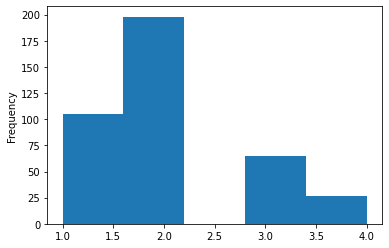

In [11]:
df.studytime.plot(kind='hist', bins= 5)

In [12]:
df.studytime.describe()

count    395.000000
mean       2.035443
std        0.839240
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

In [13]:
studytime_discretized = pd.cut(df.studytime, [1, 2, 3, float("inf")], labels=[0, 1, 2], right=False)
print(studytime_discretized)

0      1
1      1
2      1
3      2
4      1
      ..
390    1
391    0
392    0
393    0
394    0
Name: studytime, Length: 395, dtype: category
Categories (3, int64): [0 < 1 < 2]


In [14]:
df['studytime_discretized'] = studytime_discretized.astype('int')   # add the new discretized column
df = df.drop(columns='studytime')    # the original 'studytime' column can be removed from table
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,failures,...,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,absences_discretized,studytime_discretized
0,1,1,18,1,1,0,4,4,2,0,...,0,0,0,1,1,0,0,0,2,1
1,1,1,17,1,1,1,1,1,1,0,...,0,1,0,0,1,0,0,0,1,1
2,1,1,15,1,0,1,1,1,1,3,...,0,1,0,0,0,0,1,0,2,1
3,1,1,15,1,1,1,4,2,1,0,...,0,0,1,0,0,1,0,0,1,2
4,1,1,16,1,1,1,3,3,1,0,...,0,1,0,0,0,1,0,0,1,1


<AxesSubplot:ylabel='Frequency'>

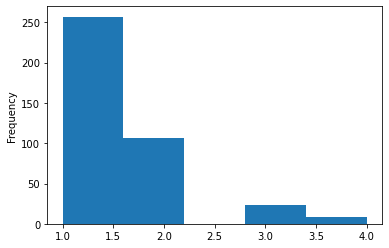

In [15]:
df.traveltime.plot(kind='hist', bins= 5)

In [16]:
df.traveltime.describe()

count    395.000000
mean       1.448101
std        0.697505
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

In [17]:
traveltime_discretized = pd.cut(df.traveltime, [1, 2, 3, float("inf")], labels=[0, 1, 2], right=False)
print(traveltime_discretized)

0      1
1      0
2      0
3      0
4      0
      ..
390    0
391    1
392    0
393    2
394    0
Name: traveltime, Length: 395, dtype: category
Categories (3, int64): [0 < 1 < 2]


In [18]:
df['traveltime_discretized'] = traveltime_discretized.astype('int')   # add the new discretized column
df = df.drop(columns='traveltime')    # the original 'traveltime' column can be removed from table
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,failures,schoolsup,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,absences_discretized,studytime_discretized,traveltime_discretized
0,1,1,18,1,1,0,4,4,0,1,...,0,0,1,1,0,0,0,2,1,1
1,1,1,17,1,1,1,1,1,0,0,...,1,0,0,1,0,0,0,1,1,0
2,1,1,15,1,0,1,1,1,3,1,...,1,0,0,0,0,1,0,2,1,0
3,1,1,15,1,1,1,4,2,0,0,...,0,1,0,0,1,0,0,1,2,0
4,1,1,16,1,1,1,3,3,0,0,...,1,0,0,0,1,0,0,1,1,0


In [19]:
G_agg = df[ ['G1', 'G2', 'G3'] ].agg('mean', axis='columns')
print(G_agg)

0       5.666667
1       5.333333
2       8.333333
3      14.666667
4       8.666667
         ...    
390     9.000000
391    15.333333
392     8.333333
393    11.000000
394     8.666667
Length: 395, dtype: float64


In [20]:
df['G_agg'] = G_agg
df = df.drop(columns=['G1', 'G2', 'G3'])
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,failures,schoolsup,...,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,absences_discretized,studytime_discretized,traveltime_discretized,G_agg
0,1,1,18,1,1,0,4,4,0,1,...,0,1,1,0,0,0,2,1,1,5.666667
1,1,1,17,1,1,1,1,1,0,0,...,0,0,1,0,0,0,1,1,0,5.333333
2,1,1,15,1,0,1,1,1,3,1,...,0,0,0,0,1,0,2,1,0,8.333333
3,1,1,15,1,1,1,4,2,0,0,...,1,0,0,1,0,0,1,2,0,14.666667
4,1,1,16,1,1,1,3,3,0,0,...,0,0,0,1,0,0,1,1,0,8.666667


In [21]:
df.G_agg.describe()

count    395.000000
mean      10.679325
std        3.696786
min        1.333333
25%        8.333333
50%       10.666667
75%       13.333333
max       19.333333
Name: G_agg, dtype: float64

In [22]:
df.age.describe()

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

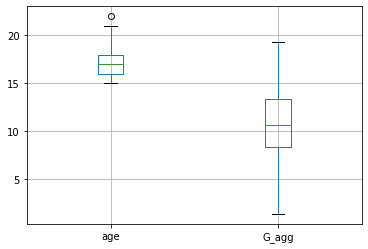

In [23]:
boxplot = df.boxplot(column=['age', 'G_agg']) 

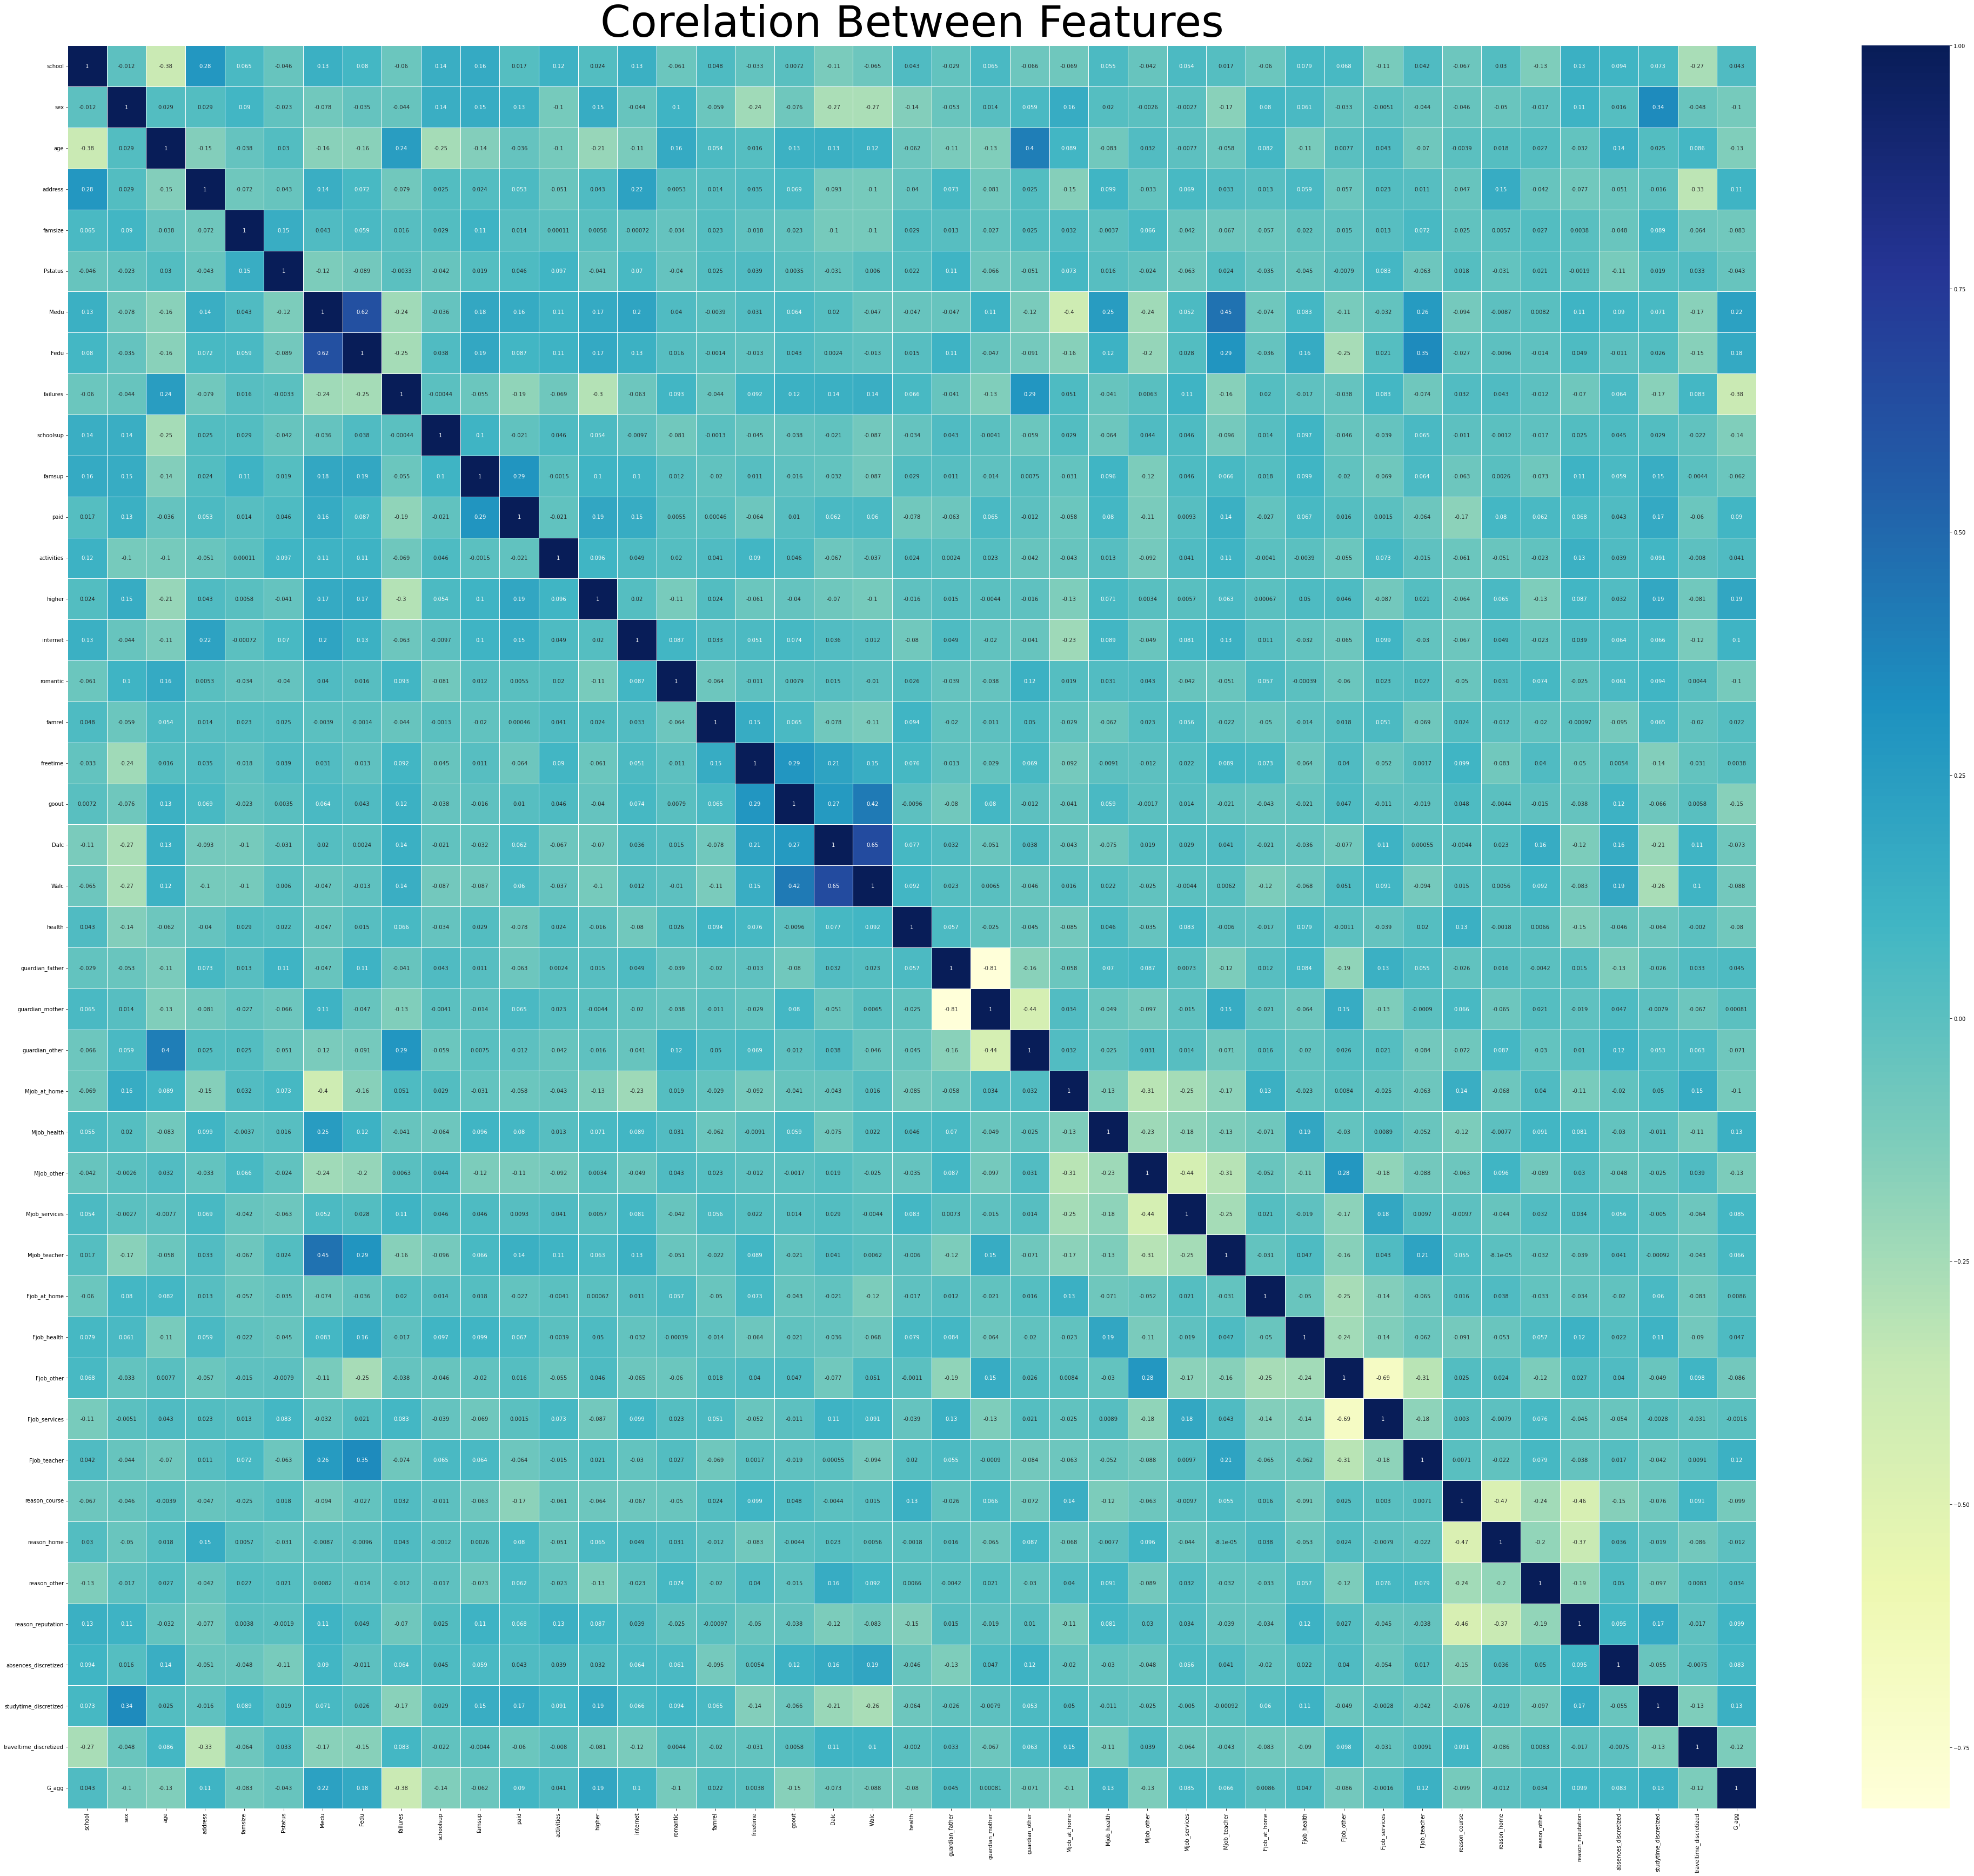

In [24]:
plt.rcParams['figure.figsize'] = (70, 60) 
sns.heatmap(df.corr(), annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features', fontsize = 80)
plt.show()

OUTCOMES

Mother and father's education and a student's interest in pursuing a higher education have the strongest positive correlation with a student's perfomance.
Past failures has the strongest negative correlation with student's perfomance.
Absences from class and traveltime between a student's home and school have the strongest positive correlation with alcohol consumption.
Studytime has the strongest negative correlation with alcohol consumption.